<a href="https://colab.research.google.com/github/mathara/Anaglyph/blob/main/Anaglifo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geração de Anáglifo


In [1]:
#left: imagem esquerda
#right:imagem direita 
#f_left: filtro aplicado na imagem esquerda 
#f_right:filtro aplicado na imagem direita
#final: imagem final

def anaglyph(left, right, final, f_left, f_right):

    width, height, channels = left.shape

    plt.imshow(left)
    plt.show()

    plt.imshow(right)
    plt.show()


    for y in range(0, height):
        for x in range(0, width):
            r1, g1, b1 = left[x, y]
            r2, g2, b2 = right[x, y]
            final[x, y] = (
                int(r1*f_left[0][0] + g1*f_left[0][1] + b1*f_left[0][2] + r2*f_right[0][0] + g2*f_right[0][1] + b2*f_right[0][2]),
                int(r1*f_left[1][0] + g1*f_left[1][1] + b1*f_left[1][2] + r2*f_right[1][0] + g2*f_right[1][1] + b2*f_right[1][2]),
                int(r1*f_left[2][0] + g1*f_left[2][1] + b1*f_left[2][2] + r2*f_right[2][0] + g2*f_right[2][1] + b2*f_right[2][2])
            )

    plt.imshow(final)
    plt.show()

In [2]:
#left: imagem esquerda
#right:imagem direita 
#final: imagem final
#gama: fator gama de correção

def Wimmer_improved (left, right, final,gama):
    width, height, channels = left.shape

    plt.imshow(left)
    plt.show()

    plt.imshow(right)
    plt.show()

    f_1 = 0.45
    f_2 = 0.25
    #gama = 1.6
    fator = 1/255

    for y in range(0, height):
        for x in range(0, width):
            r1, g1, b1 = left[x, y]
            r2, g2, b2 = right[x, y]

            r1, g1, b1 = r1/255, g1/255, b1/255
            r2, g2, b2  = r2/255, g2/255, b2/255 

            g_l = 255 * int ( g1 + f_1 * max (0 , int (r1) - int (g1) ) )
            b_l = 255 * int ( b1 + f_2 * max (0 , int (r1) - int (b1) ) )
            g_r = 255 * int ( g2 + f_1 * max (0 , int (r2) - int (g2) ) )
            b_r = 255 * int ( b2 + f_2 * max (0 , int (r2) - int (b2) ) )
            r_g = 255 * int (fator * (191 * g_l + 64 * b_l ) )
            r_a = 255 * int (pow (r_g , (1/gama)) )

            final[x, y] = (
                int(r_a),
                int(g_r),
                int(b_r)
            )

    plt.imshow(final)
    plt.show()

In [3]:
#metodo: metodo usado na foto
#image_number: nome da imagem usada
#img_F: Imagem salva

def save_img(metodo, image_number, img_F):
   diretorio_F = '/content/drive/MyDrive/PFG/Imagens/Resultados/'+ image_number +'_F_' + metodo +'.png'
   img_F = cv2.cvtColor(img_F,cv2.COLOR_RGB2BGR)
   cv2.imwrite(diretorio_F, img_F)
   return True

In [4]:
#furção geradora de histograma
def hist(img):
  color = ('B','G', 'R')
  for i, col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256], [0,256])
    plt.plot(histr, color = col)
    plt.xlim([0,256])
    
  plt.show

# Importações


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio
import imutils
cv2.ocl.setUseOpenCL(False)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Carregar as imagens

#### Diretório

In [6]:
#escolha da imagem da base
image_number = '0112'

In [7]:
# diretório de onde a foto se encontra no drive
diretorio_R = '/content/drive/MyDrive/PFG/Imagens/Teste/'+ image_number +'_R.png'
diretorio_L = '/content/drive/MyDrive/PFG/Imagens/Teste/'+ image_number +'_L.png'
diretorio_F = '/content/drive/MyDrive/PFG/Imagens/Teste/'+ image_number +'_R.png'

#### Imagens

In [8]:
#Leitura das fotos
#img_R = imageio.imread(diretorio_R)
#imageio abre RGB
img_R = cv2.imread(diretorio_R)
img_R = cv2.cvtColor(img_R, cv2.COLOR_BGR2RGB)

In [9]:
#img_L = imageio.imread(diretorio_L)
img_L = cv2.imread(diretorio_L)
img_L = cv2.cvtColor(img_L,cv2.COLOR_BGR2RGB)

In [10]:
#img_F = imageio.imread(diretorio_L)
img_F = cv2.imread(diretorio_L)
img_F = cv2.cvtColor(img_F,cv2.COLOR_BGR2RGB)

#### Características

In [11]:
 # Análise da foto e dimensões
 height, width, channels = img_L.shape
 print (height, width, channels)

600 800 3


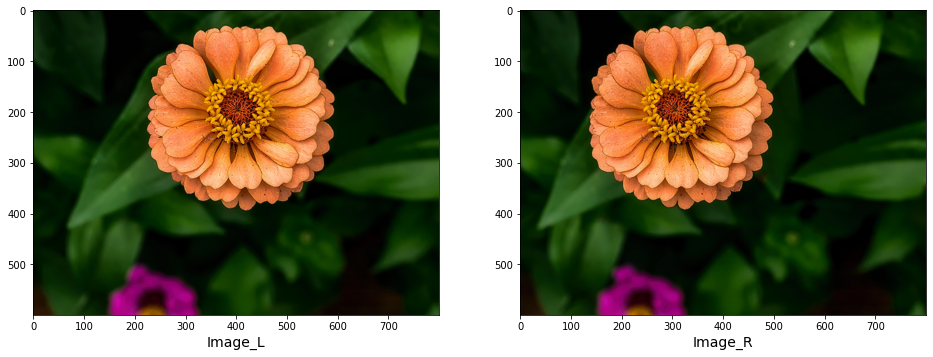

In [12]:
#Exibição da foto
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=False, figsize=(16,9))
ax1.imshow(img_L, cmap="gray")
ax1.set_xlabel("Image_L", fontsize=14)

ax2.imshow(img_R, cmap="gray")
ax2.set_xlabel("Image_R", fontsize=14)

plt.show()

# Métodos

## True Anaglyphs
Fonte : http://www.3dtv.at/knowhow/anaglyphcomparison_en.aspx

In [13]:
#método usado e os filtros
metodo = 'True_Anaglyphs'

fl =     np.array([[0.299, 0.587, 0.114],
                    [0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0]])

fr =     np.array([[0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0],
                    [0.299, 0.587, 0.114]])

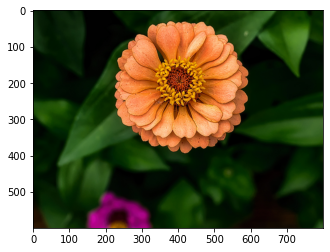

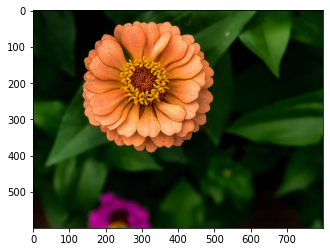

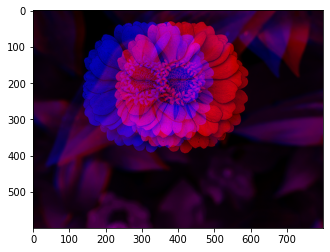

In [14]:
#geracao do anáglifo
anaglyph(img_L,img_R,img_F,fl,fr)

In [15]:
save_img(metodo, image_number, img_F)

True

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  func(*args, **kwargs)


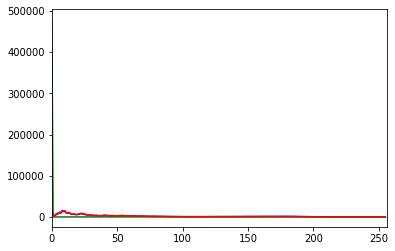

In [16]:
hist(img_F)

## Gray Anaglyphs

In [17]:
metodo = 'Gray_Anaglyphs'

fl =     np.array([[0.299, 0.587, 0.114],
                    [0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0]])

fr =     np.array([[0.0, 0.0, 0.0],
                    [0.299, 0.587, 0.114],
                    [0.299, 0.587, 0.114]])

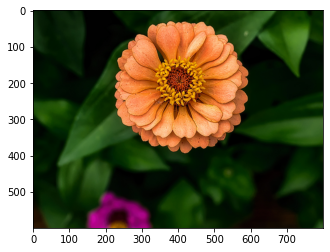

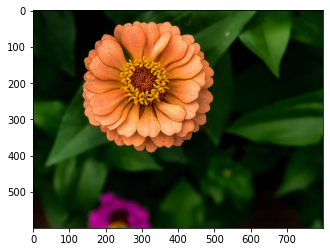

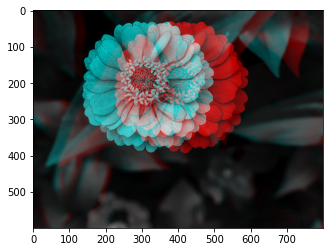

In [18]:
anaglyph(img_L,img_R,img_F,fl,fr)

In [19]:
save_img(metodo, image_number, img_F)

True

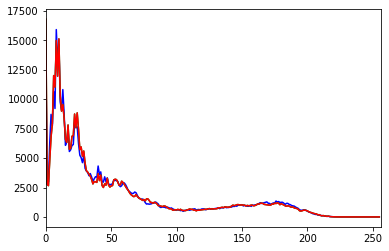

In [20]:
hist(img_F)

## Color Anaglyphs

In [21]:
metodo = 'Color_Anaglyphs'

fl =     np.array([[1, 0.0, 0.0],
                    [0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0]])

fr =     np.array([[0.0, 0.0, 0.0],
                    [0.0, 1, 0.0],
                    [0.0, 0.0, 1]])

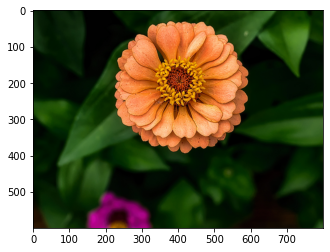

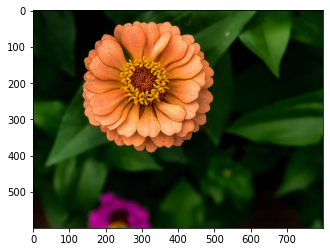

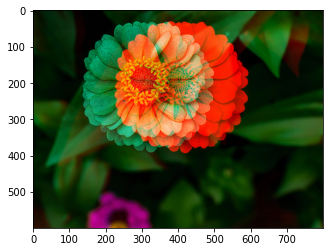

In [22]:
anaglyph(img_L,img_R,img_F,fl,fr)

In [23]:
save_img(metodo, image_number, img_F)

True

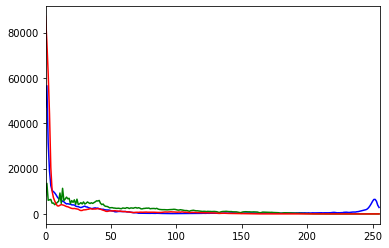

In [24]:
hist(img_F)

## Half Color Anaglyphs

In [25]:
metodo = 'Half_Color_Anaglyphs'

fl =     np.array([[0.299, 0.587, 0.114],
                    [0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0]])

fr =     np.array([[0.0, 0.0, 0.0],
                    [0.0, 1, 0.0],
                    [0.0, 0.0, 1]])

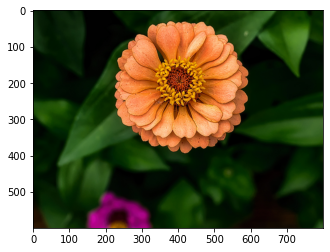

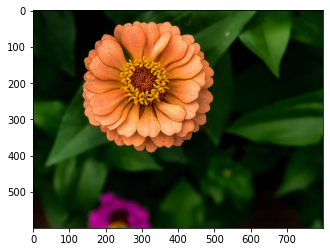

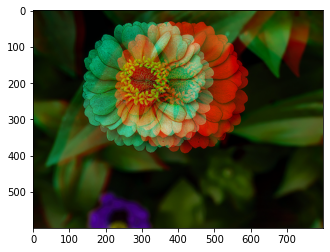

In [26]:
anaglyph(img_L,img_R,img_F,fl,fr)

In [27]:
save_img(metodo, image_number, img_F)

True

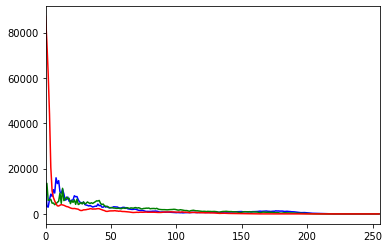

In [28]:
hist(img_F)

## Optimized Anaglyphs
### Wimmer Maps

In [29]:
metodo = 'Winner_Map_Anaglyphs'

fl =     np.array([[0.0, 0.7, 0.3],
                    [0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0]])

fr =     np.array([[0.0, 0.0, 0.0],
                    [0.0, 1, 0.0],
                    [0.0, 0.0, 1]])

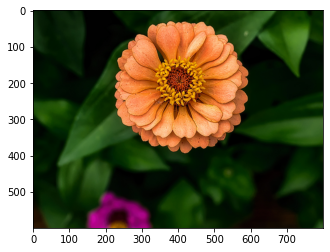

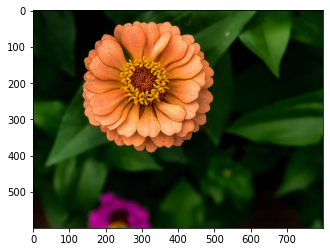

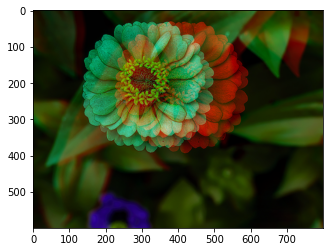

In [30]:
anaglyph(img_L,img_R,img_F,fl,fr)

In [31]:
save_img(metodo, image_number, img_F)

True

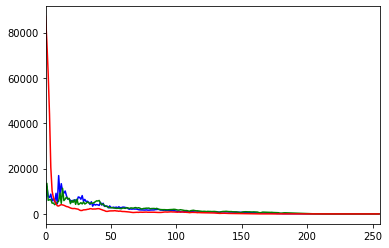

In [32]:
hist(img_F)

##Wimmer’s improved method

#### a gamma correction is applied to brighten up final red channel ra that partially maps the red channels to green and blue before applying the formula

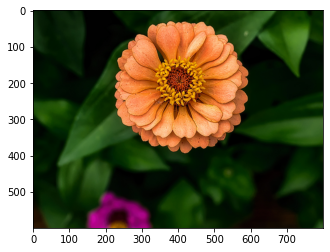

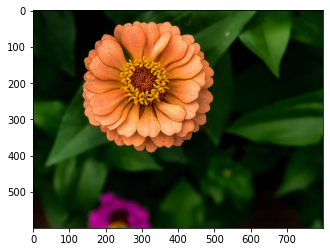

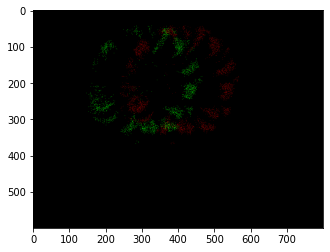

In [33]:
Wimmer_improved(img_L,img_R,img_F, 1.6)

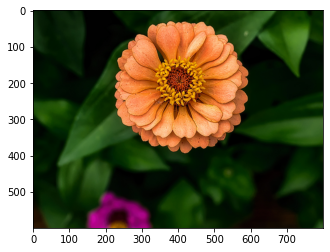

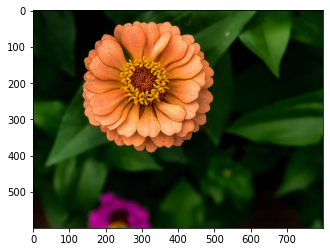

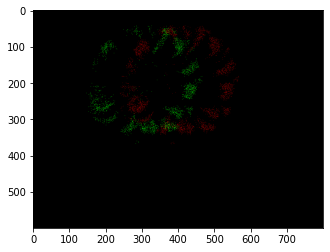

In [34]:
Wimmer_improved(img_L,img_R,img_F, 1)

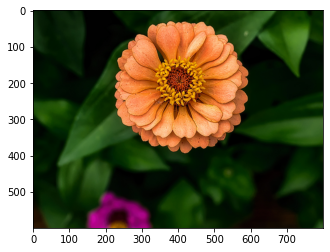

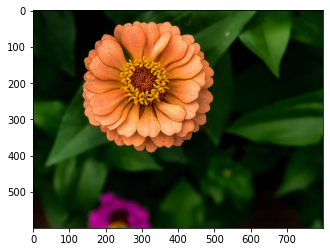

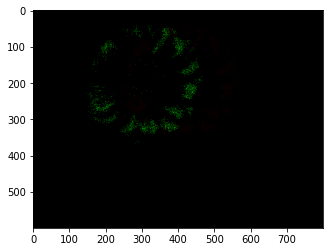

In [35]:
Wimmer_improved(img_L,img_R,img_F, 1.75)

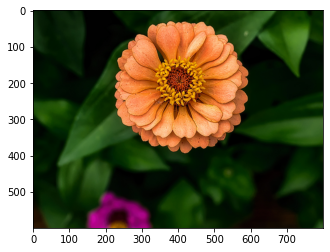

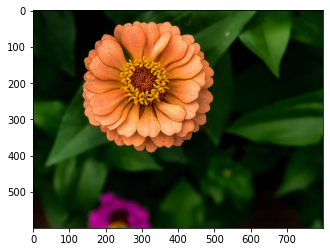

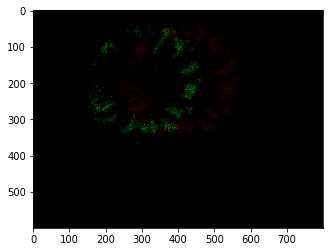

In [36]:
Wimmer_improved(img_L,img_R,img_F, 0.5)

##The Dubois Algorithm

In [37]:
fl =     np.array([[0.4561, 0.500484, 0.176381],
                    [-0.0400822, -0.0378246, -0.0157589],
                    [-0.015261, -0.0205971, -0.00546856]])
fr =     np.array([[-0.0434706, -0.0879388, -0.00155529],
                    [0.378476, 73364, -0.0184503],
                    [-0.0721527, -0.112961, 1.2264]])

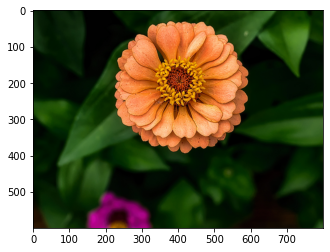

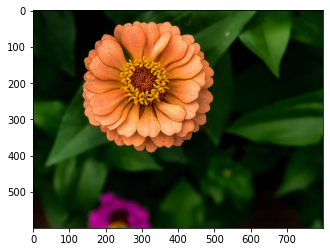

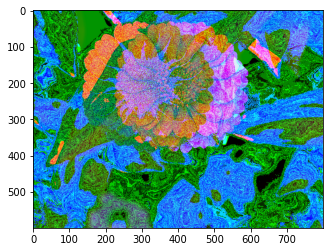

In [38]:
anaglyph(img_L,img_R,img_F,fl,fr)

##Midpoint Algoritm



In [39]:
Al =     np.array([[5.42327, .807004, .047325],
                    [2.70972, .50201, .0250529],
                    [.0000550941, .000411221, .00240686]])
Ar =     np.array([[.180431, 1.6395, 2.00309],
                    [.448214, 6.31551, 1.35757],
                    [.289201, 2.3925, 11.062]])

<function matplotlib.pyplot.show>

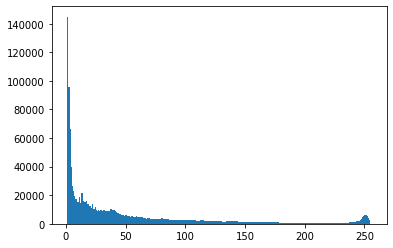

In [40]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from skimage import io

imag = img_L
ax = plt.hist(imag.ravel(), 256,[1,256])
plt.show





<function matplotlib.pyplot.show>

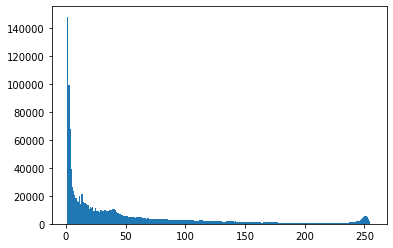

In [41]:
imag = img_R
ax = plt.hist(imag.ravel(), 256,[1,256])
plt.show

<function matplotlib.pyplot.show>

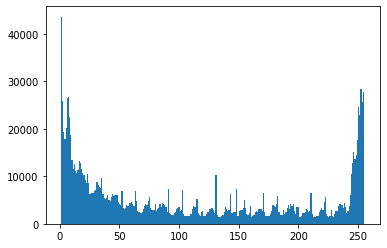

In [42]:
imag = img_F
ax = plt.hist(imag.ravel(), 256,[1,256])
plt.show

In [43]:
teste = img_F
#teste[:,:,1] = 0
#teste[:,:,2] = 0
#metodo = 'P_RED'
#save_img(metodo, image_number, teste)
#teste[:,:,0] = 0
#metodo = 'P_CIAN'
#save_img(metodo, image_number, teste)

In [44]:
import numpy as np
AL = np.array([[5.42327, .807004, .047325], # Left anaglyph filter
               [2.70972, .50201, .0250529],
               [.0000550941, .000411221, .00240686]])
AR = np.array([[.180431, 1.6395, 2.00309], # Right anaglyph filter
               [.448214, 6.31551, 1.35757],
               [.289201, 2.3925, 11.062]])
R = np.concatenate((AL, AR))
C = np.array([[11.6638, 8.3959, 4.65843], # CRT spectral distribution
              [7.10807, 16.6845, 2.45008],
              [.527874, 3.79124, 24.0604]])
Z = np.array([[0, 0, 0],
              [0, 0, 0],
              [0, 0, 0]])
D = np.concatenate((np.concatenate((C, Z), 1), np.concatenate((Z, C), 1)))
B = np.dot(np.dot(np.linalg.inv(np.dot(R.transpose(), R)), R.transpose()), D)
N = np.diagflat([1 / sum(B[0]), 1 / sum(B[1]), 1 / sum(B[2])])
print(np.dot(N, B))

[[ 0.45610004  0.50048381  0.17638087 -0.0434706  -0.08793882 -0.00155529]
 [-0.04008216 -0.03782458 -0.01575895  0.37847603  0.73363998 -0.01845032]
 [-0.01521607 -0.02059714 -0.00546856 -0.07215268 -0.11296065  1.2263951 ]]
